### Github link: https://github.com/R0ner/comsosci-assignments
### All group members contributed equally to all parts of the assignment

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import netwulf as nw
import json

import matplotlib.dates as mdates
from datetime import datetime
from networkx.readwrite import json_graph

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
* **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?
> The dataset consists of approximately 19 300 submissions to the WallStreetBets subreddit, and 653 000 comments on those posts. It might be possible to gather 19k responses via surveys, but it would take an enormous amount of time, and would be equally as expensive. The 650k comments, and the data about relations between these data points, would be impossible to gather using traditional methods.
* **Always-on**. Can you keep collecting data over time?
> The subreddit will keep generating posts and comments, but since the GME boom of early 2021 is the main scope of these excercises, and the amount of new posts and comments on that subject is not very high. It will however be possible to monitor the effects of new stock market events in real-time, so yes, the dataset is always-on.
* **Non-reactive**. Is the dataset non-reactive?
> Yes, a cardinal rule of the internet is that a Redditor will always act like a Redditor, and since it is never actually announced to them that their data is being collected, it is very unlikely that studies like these would change their behaviour.
* **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price?
> The GME boom was discussed in practically every media, so even though a big part of the actual action happened on WallStreetBets, it's not the entire story. For example it contains very little information on internal matters in Gamestop, and on how and why the hedge funds actually shorted them.
* **Inaccessible**. Is the data accessible?
> The data about posts and comments is very accessible (albeit you have to be willing to wait for pushshift), but it isn't unrealistic that reddit would've kept records of deleted content, and they of course store a lot of user data that we cannot access.
* **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
> There is no doubt that the members of a finance subreddit is NOT a representative sample of the general population, but data like this might give an insight into how viral movements on the internet generally work.
* **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
> The way that people use Reddit haven't changed much, a fact that may be attributed to the very clear division into subreddits, that are clearly defined for one purpose. The active member community changes continuously, but the key members are likely to stick around, especially during the lifetime of events that they helped spin up.
* **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
> Reddit pushes popular content like many other social media, so the traction of a post has a lot to do with how many upvotes it happens to get in the first few minutes. This however isn't too different to how humans work in general; most of us are probably exposed way more to the Kardashians than we would like to.
* **Dirty**. What aspect may make this dataset *dirty*?
> Bots are very common on reddit, and they are often employed by the moderators themselves to help them out. Well meaning bots usually have 'bot' in their name, and are as such easy to filter out, but the others might be harder.
* **Sensitive**. Is there any sensitive information in the data?
> If the reddit usernames could be deanonymised, it would be possible to link reddit users and their questionable financial decisions to actual people. Otherwise, all of the data is anonymous, and given up voluntarily by the authors.

# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

Before getting to the plot code, we would like to answer question 2.1.3:

By using the log-scale on the y-axis, we can have sections on the graph with wildy different values (eg. 10 comments per day vs. 100 000 comments per day), and be able to visually inspect trends at all of them. By using a rolling window, we can minimize the effects of noise and small fluctuations on the overall look of the graph, while still preserving overarching trends. It is often a good idea to include the non-smoothed data, either as a semi-transparent line, or on a plot in the appendix.

In [9]:
GME = pd.read_csv("GME.csv", parse_dates=['Date']).set_index('Date')
comments = pd.read_csv("comments.csv", parse_dates=['created']).set_index('created')

# sanity check
len(GME), len(comments)

(267, 653328)

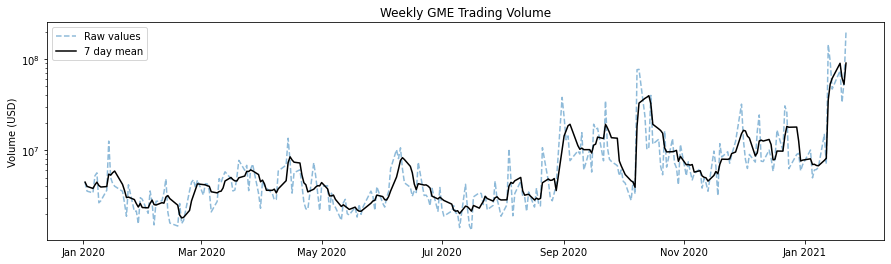

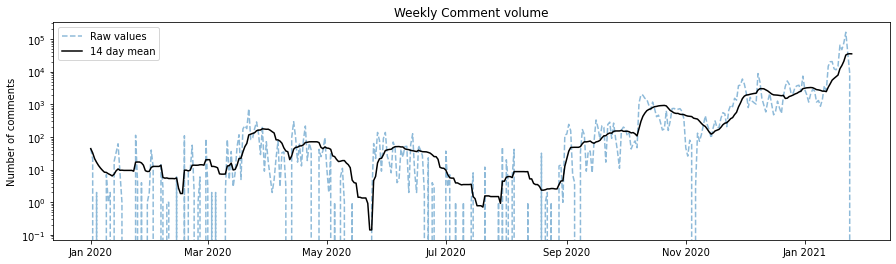

In [14]:
# both plots in same cell to make comparisons easier

rolling_volume = GME['Volume'].rolling('7D').mean()
fig, ax = plt.subplots(figsize=(15, 4))
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
ax.plot(GME.index, GME.Volume, ls='--', alpha=0.5, label="Raw values")
ax.plot(rolling_volume.index, rolling_volume.values, c='k', label="7 day mean")
ax.set_yscale('log')
ax.set_ylabel('Volume (USD)')
ax.set_title("Weekly GME Trading Volume")
plt.legend()
plt.show()


cdata = comments.resample('D').apply({'id':'count'})
cutoff = datetime(2021, 1, 26)
cdata = cdata[cdata.index < cutoff]
rolling = cdata["id"].rolling('14D').mean()
fig, ax = plt.subplots(figsize=(15, 4))
ax.xaxis.set_major_formatter(date_format)
ax.plot(cdata.index, cdata.values, ls='--', alpha=0.5, label="Raw values")
ax.plot(rolling.index, rolling.values, c='k', label="14 day mean")
ax.set_yscale('log')
ax.set_ylabel('Number of comments')
ax.set_title("Weekly Comment volume")
plt.legend()
plt.show()

## Comments on the figures:

It is clear from the figures that there is a positive correlation between the trading volume and the number of comments. We see the first major spikes in trading volume in September and October of 2020, and at exactly the same time the number of comments rises sharply. The log plot makes it seem less impressive, but from October the end of January the number of comments grow by three orders of magnitude.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*


## 2.2.1, 2.2.2, 2.2.3

In [16]:
close = GME['Close']
log_returns = np.log(close.shift(1) / close)[1:]
log_comments = np.log(cdata.shift(1) / cdata)[2:-3]
# since we only have returns data for some days
log_comments = log_comments[log_comments.index.isin(log_returns.index)]

In [24]:
x = log_comments[~log_comments.isin([np.nan, np.inf, -np.inf]).any(1)].iloc[:,0]
y = log_returns[~log_comments.isin([np.nan, np.inf, -np.inf]).any(1)]
cl = close[1:][~log_comments.isin([np.nan, np.inf, -np.inf]).any(1)]

from scipy.stats import pearsonr
print(f"Correlation coefficient: {pearsonr(x, y)[0]:.3f}")
print(f"p-value:                 {pearsonr(x, y)[1]:.3f}")

Correlation coefficient: 0.390
p-value:                 0.000


We see a positive correlation between the log-returns and the log-change in number of comments, and since the p-value is definitely below .05, we conclude that it is statistically significant.

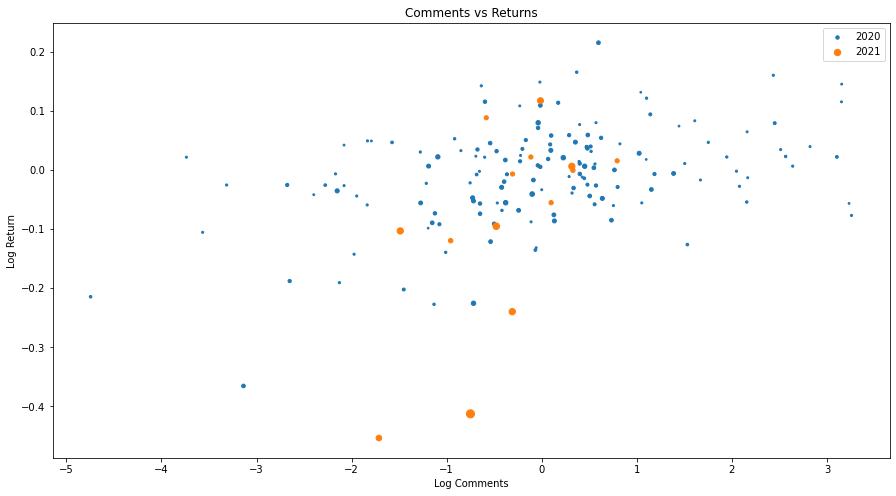

In [20]:
c = x.index < datetime(2021, 1, 1)
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x[c], y[c], s=cl[c], label="2020")
ax.scatter(x[np.logical_not(c)], y[np.logical_not(c)], s=cl[np.logical_not(c)], label="2021")
ax.set_xlabel('Log Comments')
ax.set_ylabel('Log Return')
ax.set_title("Comments vs Returns")
ax.legend()
plt.show()

From the scatterplot we see something interesting; when the close price is high as in 2021, the relationship between log-comments and log-returns is way stronger. It is very likeely that close price is just a confounder for the two variables, but maybe there is a causal relationship one way or the other. 

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

## Exercise 2.1  
The Königsberg Problem

<img src="graph_problem.jpg" alt="Drawing" style="width: 400px;"/>

<em>Which of the icons in the above image can be drawn without raising your pencil from the paper, and without drawing any line more than once? Why?</em>

### Solution:  
As with the original Königsberg problem, the drawing must have one and only one starting- and ending-point. The intersections between lines can be represented nodes in a graph, while the line-sections between intersections can be represented as edges. As such, we can represent the problem as a graph. An intersection between lines in the drawing must be either a starting point or an ending point, if it has an odd number of lines intersecting it. Therefore, drawing with more than 2 intersections with an odd number of lines intersecting must be invalid.  
Below, the each drawing with the number of nodes (intersections) with an odd number of links is listed:  
a:  2  
b:  4  
c:  0  
d:  2  

Since that b has more than 2 nodes with an odd number of links, it is impossible to draw it without raising the pencil from the paper. It is possible for all the other icons.

## Exercise 2.3
Graph representation

<img src="graph_representation.jpg" alt="Drawing" style="width: 700px;"/>

<em>Construct for the networks (a) and (b) in the above image:

- The corresponding adjacency matrices.
- The corresponding link lists.
- Determine the average clustering coefficient of the network shown in Image 2.20a
- If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?
- What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
- In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

### Solution:
Adjacency matrices:  
a)  
$ \begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 
\end{bmatrix}  $  
b)  
$ \begin{bmatrix}
0 & 0 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 
\end{bmatrix}  $

Link lists:  
a)  
$ \begin{bmatrix}
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 6 \\
2 & 1 \\
2 & 3 \\
2 & 4 \\
3 & 1 \\
3 & 2 \\
3 & 6 \\
4 & 1 \\
4 & 2 \\
6 & 1 \\
6 & 3 
\end{bmatrix}  $  
b)  
$ \begin{bmatrix}
1 & 2 \\
2 & 3 \\
2 & 4 \\
3 & 1 \\
3 & 2 \\
4 & 1 \\
6 & 1 \\
6 & 3
\end{bmatrix}  $  
Determine the average clustering coefficient of network a.

In [2]:
A = nx.from_numpy_matrix(np.array([[0, 1, 1, 1, 0, 1], 
                                   [1, 0, 1, 1, 0, 0], 
                                   [1, 1, 0, 0, 0, 1], 
                                   [1, 1, 0, 0, 0, 0], 
                                   [0, 0, 0, 0, 0, 0], 
                                   [1, 0, 1, 0, 0, 0]]))
print('Average clustering coefficient for network a is', nx.average_clustering(A))

Average clustering coefficient for network a is 0.6388888888888888


<em>If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?</em>  
For the adjacency matrix, it simply corresponds to swapping row 5 with row 6 and column 5 with column 6. In the link list, all occurences of 5 are swapped with 6 and vice versa.

<em>What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?</em>  
For the adjacency matrix, it is very easy to infer the degree of each node. This is harder in the link list representation.

<em>In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?</em>  
a)  
There exists 3 paths of length 3 with repetitions from 1 to 3: 
[4, 1, 3], [2, 1, 3], [4, 2, 3]  

b)  
There exists 0 paths of length 3 with repetitions from 1 to 3.

## Exercise 2.5
Bipartite networks.

<img src="bipartite.jpg" alt="Drawing" style="width: 600px;"/>

- Construct its adjacency matrix. Why is it a block-diagonal matrix?
- Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.
- Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.
- Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

### Solution:
<em>Construct its adjacency matrix.</em>  
$ \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 
\end{bmatrix}  $  
<em> Why is it a block-diagonal matrix? </em>  
It is a block diagonal matrix because that all nodes with index less than 7 are not connected with each other and all nodes above and including index 7 are not connected with each other.

<em>Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.</em>  
Purple:  
$ \begin{bmatrix}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 
\end{bmatrix}  $  
Green:  
$ \begin{bmatrix}
0 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 
\end{bmatrix}  $

<em>Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.</em>  
The degree of each node is simply the sum of the corresponding row.  
Average degree of purple nodes: $k_{avg}=1.67$  
Average degree of green nodes: $k_{avg}=2.00$

<em>Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?</em>
Average degree of purple nodes (projection): $k_{avg}=2.67$  
Average degree of green nodes (projection): $k_{avg}=2.00$

The results are not quite the same, which is suprising!


# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [3]:
with open('author_graph.json') as f:
    DG = json_graph.node_link_graph(json.load(f))
nx.info(DG)

'DiGraph with 26394 nodes and 97412 edges'

The average degree of a random network is related to p as follows:  
$<k>=p\cdot(N-1)$
Therefore, we can get p by  
$p=\frac{<k>}{N-1}$ 

In [4]:
degrees = pd.DataFrame.from_dict({'degree': dict(DG.degree)})
N = len(degrees)
degrees.head()

,degree
----The_Truth-----,10
---MrP---,8
---Tim---,8
--IdiotSavant--,3
--Kurwa--,4


In [5]:
k = degrees.mean().item()
p = k / (N - 1)
k, p

(7.381374554823066, 0.00027967167638476363)

We get that $p\approx0.00028$. A random network can now be simulated:

In [6]:
# Random network
RG = nx.fast_gnp_random_graph(N, p, seed=1510, directed=True)
nx.info(RG)

'DiGraph with 26394 nodes and 194259 edges'

In [7]:
# nw.visualize(RG)

The random network:

<img src="random network.png" alt="Drawing" style="width: 800px;"/>

The actual redditor network:

<img src="network.png" alt="Drawing" style="width: 800px;"/>

The main differences between the networks are that the actual redditor network is that the distribution of degrees of the nodes are much more imablanced in the actual network compared to the random network. In the actual network, a small number of nodes have a huge number of links, while the random network has a large number of nodes with an average number of links.

<em>Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book. 

In [8]:
C = np.array(list(nx.clustering(RG).values()))
print(f'Proportion of nodes with a clustering coefficient of 0: {round((C == 0).sum() / C.size * 100, 2)}%')

Proportion of nodes with a clustering coefficient of 0: 94.32%


99.26% of all the nodes have a clustering coefficient of 0. This makes sense, since p is very small.

<em>Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?

In [13]:
avg_clust_random = nx.average_clustering(RG)
print('The average clustering coefficient for the random network:', avg_clust_random)

The average clustering coefficient for the random network: 0.0002702861983965874


Equation 3.21 states, that the average clustering coefficient of a random network is simply $p$. In the cell below, the two quantities are compared.

In [14]:
np.abs(avg_clust_random - p)

9.385477988176213e-06

The discrepancy betwen the actual average clustering coefficient and the analytical average clustering coefficient is relatively small. However, it is not completely consistent for this particular realisation.

<em>Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [17]:
avg_clust_reddit = nx.average_clustering(DG)
print('The average clustering coefficient for the redditor network:', avg_clust_reddit)
print(f'The average clustering coefficient for the redditor network is {round(avg_clust_reddit / avg_clust_random, 2)}' + 
       ' times larger than the average clustering coefficient for the random network.')

The average clustering coefficient for the redditor network: 0.04731332888300066
The average clustering coefficient for the redditor network is 175.05 times larger than the average clustering coefficient for the random network.


The average clustering coefficient is much, much larger for the Redditors netowrk. Even though the number of links should be approximately the same in the two networks, the connections are much more uniformly distributed in the random one, and as such they do not accumulate large clustering coefficients. The exact opposite is true in the reddit data, where popular posts tend to attract more and more traffic, thus growing the coefficients massively.